# Create a dataset for Deep Learning Projects from Google images

The notebook is extensively based on this blog post:

https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/

Thank you @Adrian Rosebrock for the great article.


### 1. Create a text files with links to all images: urls.txt

1. run a query on Google Image
2. scroll down until you go thru all the files you want
3. Open Javascript console: `View => Developer => JavaScript Console`
4. Select Tab `console`
5. Pull down jquery into the JavaScript console
-------
```
var script = document.createElement('script');
script.src = "https://ajax.googleapis.com/ajax/libs/jquery/2.2.0/jquery.min.js";
document.getElementsByTagName('head')[0].appendChild(script);
```
--------

7. Grab the URLs
----
```
var urls = $('.rg_di .rg_meta').map(function() { return JSON.parse($(this).text()).ou; });
```
-----

8. write the URls to file (one per line)
------
```
var textToSave = urls.toArray().join('\n');
var hiddenElement = document.createElement('a');
hiddenElement.href = 'data:attachment/text,' + encodeURI(textToSave);
hiddenElement.target = '_blank';
hiddenElement.download = 'urls.txt';
hiddenElement.click();
```
------

### 2. Download images
We will be saving the images in the folder `images/`


In [21]:
# Required Libraries
import requests
import cv2
import os
import matplotlib.pyplot as plt
import hashlib
from PIL import Image
import io
import numpy as np

# arguments
urls = "urls.txt"
output = "images"

[INFO] downloaded: images/00000000.jpg
[INFO] downloaded: images/00000001.jpg
[INFO] downloaded: images/00000002.jpg
[INFO] downloaded: images/00000003.jpg
[INFO] downloaded: images/00000004.jpg
[INFO] downloaded: images/00000005.jpg
[INFO] downloaded: images/00000006.jpg
[INFO] downloaded: images/00000007.jpg
[INFO] downloaded: images/00000008.jpg
[INFO] downloaded: images/00000009.jpg
[INFO] downloaded: images/00000010.jpg
[INFO] downloaded: images/00000011.jpg
[INFO] downloaded: images/00000012.jpg
[INFO] downloaded: images/00000013.jpg
[INFO] downloaded: images/00000014.jpg
[INFO] error downloading https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=1897233623848879
[INFO] downloaded: images/00000015.jpg
[INFO] downloaded: images/00000016.jpg
[INFO] downloaded: images/00000017.jpg
[INFO] downloaded: images/00000018.jpg
[INFO] downloaded: images/00000019.jpg
[INFO] downloaded: images/00000020.jpg
[INFO] downloaded: images/00000021.jpg
[INFO] downloaded: images/00000022.jpg

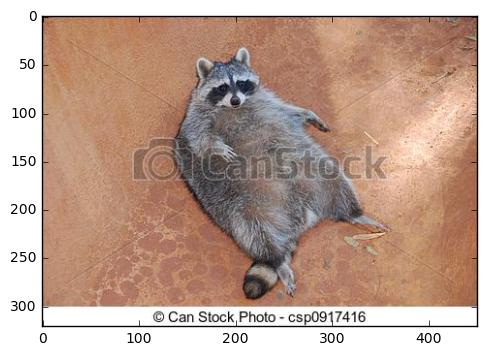

[INFO] downloaded: images/00000049.jpg
[INFO] downloaded: images/00000050.jpg
[INFO] downloaded: images/00000051.jpg
[INFO] downloaded: images/00000052.jpg
[INFO] downloaded: images/00000053.jpg
[INFO] downloaded: images/00000054.jpg
[INFO] downloaded: images/00000055.jpg
[INFO] downloaded: images/00000056.jpg
[INFO] downloaded: images/00000057.jpg
[INFO] downloaded: images/00000058.jpg
[INFO] downloaded: images/00000059.jpg
[INFO] downloaded: images/00000060.jpg
[INFO] downloaded: images/00000061.jpg
[INFO] downloaded: images/00000062.jpg
[INFO] downloaded: images/00000063.jpg
[INFO] downloaded: images/00000064.jpg
[INFO] downloaded: images/00000065.jpg
[INFO] downloaded: images/00000066.jpg
[INFO] downloaded: images/00000067.jpg
[INFO] downloaded: images/00000068.jpg
[INFO] error downloading http://unisci24.com/data_images/wlls/41/312474-racoon.jpg
[INFO] downloaded: images/00000069.jpg
[INFO] downloaded: images/00000070.jpg
[INFO] downloaded: images/00000071.jpg
[INFO] downloaded: i

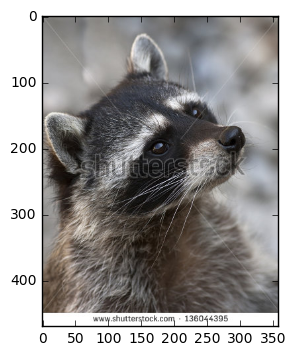

[INFO] downloaded: images/00000099.jpg
[INFO] downloaded: images/00000100.jpg
[INFO] downloaded: images/00000101.jpg
[INFO] downloaded: images/00000102.jpg
[INFO] downloaded: images/00000103.jpg
[INFO] error downloading http://animalli.com/wp-content/uploads/2016/11/animals-multi-screen-monitor-raton-racoon-multiple-triple-laveur-wallpaper-desktop-free-download-1920x1080.jpg
[INFO] downloaded: images/00000104.jpg
[INFO] downloaded: images/00000105.jpg
[INFO] downloaded: images/00000106.jpg
[INFO] downloaded: images/00000107.jpg
[INFO] downloaded: images/00000108.jpg
[INFO] downloaded: images/00000109.jpg
[INFO] downloaded: images/00000110.jpg
[INFO] downloaded: images/00000111.jpg
[INFO] downloaded: images/00000112.jpg
[INFO] downloaded: images/00000113.jpg
[INFO] downloaded: images/00000114.jpg
[INFO] downloaded: images/00000115.jpg
[INFO] downloaded: images/00000116.jpg
[INFO] downloaded: images/00000117.jpg
[INFO] downloaded: images/00000118.jpg
[INFO] downloaded: images/00000119.jp

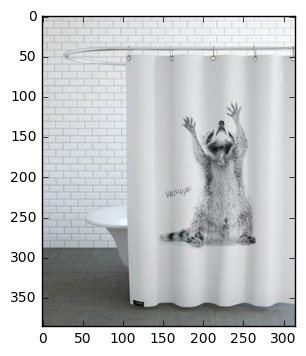

[INFO] downloaded: images/00000149.jpg
[INFO] downloaded: images/00000150.jpg
[INFO] downloaded: images/00000151.jpg
[INFO] downloaded: images/00000152.jpg
[INFO] downloaded: images/00000153.jpg
[INFO] downloaded: images/00000154.jpg
[INFO] downloaded: images/00000155.jpg
[INFO] downloaded: images/00000156.jpg
[INFO] downloaded: images/00000157.jpg
[INFO] downloaded: images/00000158.jpg
[INFO] downloaded: images/00000159.jpg
[INFO] downloaded: images/00000160.jpg
[INFO] downloaded: images/00000161.jpg
[INFO] downloaded: images/00000162.jpg
[INFO] downloaded: images/00000163.jpg
[INFO] downloaded: images/00000164.jpg
[INFO] downloaded: images/00000165.jpg
[INFO] downloaded: images/00000166.jpg
[INFO] downloaded: images/00000167.jpg
[INFO] downloaded: images/00000168.jpg
[INFO] downloaded: images/00000169.jpg
[INFO] downloaded: images/00000170.jpg
[INFO] downloaded: images/00000171.jpg
[INFO] downloaded: images/00000172.jpg
[INFO] downloaded: images/00000173.jpg
[INFO] downloaded: images

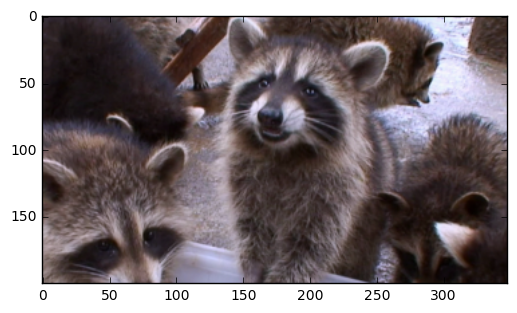

[INFO] downloaded: images/00000199.jpg
[INFO] downloaded: images/00000200.jpg
[INFO] downloaded: images/00000201.jpg
[INFO] downloaded: images/00000202.jpg
[INFO] downloaded: images/00000203.jpg
[INFO] downloaded: images/00000204.jpg
[INFO] downloaded: images/00000205.jpg
[INFO] downloaded: images/00000206.jpg
[INFO] downloaded: images/00000207.jpg
[INFO] downloaded: images/00000208.jpg
[INFO] downloaded: images/00000209.jpg
[INFO] downloaded: images/00000210.jpg
[INFO] downloaded: images/00000211.jpg
[INFO] downloaded: images/00000212.jpg
[INFO] downloaded: images/00000213.jpg
[INFO] downloaded: images/00000214.jpg
[INFO] downloaded: images/00000215.jpg
[INFO] downloaded: images/00000216.jpg
[INFO] downloaded: images/00000217.jpg
[INFO] downloaded: images/00000218.jpg
[INFO] downloaded: images/00000219.jpg
[INFO] downloaded: images/00000220.jpg
[INFO] error downloading http://animalli.com/wp-content/uploads/2016/09/animals-racoon-cute-animal-wallpaper-in-hd.jpg
[INFO] downloaded: imag

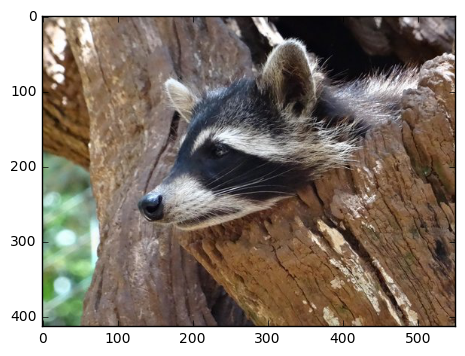

[INFO] downloaded: images/00000249.jpg
[INFO] downloaded: images/00000250.jpg
[INFO] downloaded: images/00000251.jpg
[INFO] downloaded: images/00000252.jpg
[INFO] downloaded: images/00000253.jpg
[INFO] downloaded: images/00000254.jpg
[INFO] downloaded: images/00000255.jpg
[INFO] downloaded: images/00000256.jpg
[INFO] downloaded: images/00000257.jpg
[INFO] downloaded: images/00000258.jpg
[INFO] downloaded: images/00000259.jpg
[INFO] downloaded: images/00000260.jpg
[INFO] downloaded: images/00000261.jpg
[INFO] downloaded: images/00000262.jpg
[INFO] downloaded: images/00000263.jpg
[INFO] downloaded: images/00000264.jpg
[INFO] downloaded: images/00000265.jpg
[INFO] downloaded: images/00000266.jpg
[INFO] downloaded: images/00000267.jpg
[INFO] downloaded: images/00000268.jpg
[INFO] downloaded: images/00000269.jpg
[INFO] downloaded: images/00000270.jpg
[INFO] downloaded: images/00000271.jpg
[INFO] downloaded: images/00000272.jpg
[INFO] downloaded: images/00000273.jpg
[INFO] downloaded: images

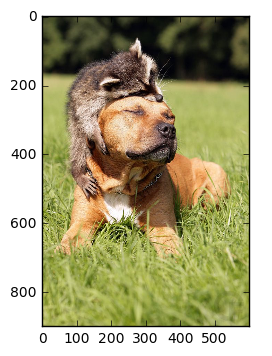

[INFO] downloaded: images/00000299.jpg
[INFO] downloaded: images/00000300.jpg
[INFO] downloaded: images/00000301.jpg
[INFO] downloaded: images/00000302.jpg
[INFO] downloaded: images/00000303.jpg
[INFO] downloaded: images/00000304.jpg
[INFO] downloaded: images/00000305.jpg
[INFO] downloaded: images/00000306.jpg
[INFO] error downloading https://feweek.co.uk/wp-content/uploads/2017/06/racoon-dog-babies-MAIN.png
[INFO] downloaded: images/00000307.jpg
[INFO] downloaded: images/00000308.jpg
[INFO] downloaded: images/00000309.jpg
[INFO] error downloading https://cottagelife.com/wp-content/uploads/2017/04/Screen-Shot-2017-04-03-at-3.45.28-PM.png
[INFO] downloaded: images/00000310.jpg
[INFO] downloaded: images/00000311.jpg
[INFO] error downloading https://i2-prod.mirror.co.uk/incoming/article4327939.ece/ALTERNATES/s615/Racoon-Dog.jpg
[INFO] downloaded: images/00000312.jpg
[INFO] downloaded: images/00000313.jpg
[INFO] downloaded: images/00000314.jpg
[INFO] downloaded: images/00000315.jpg
[INFO] 

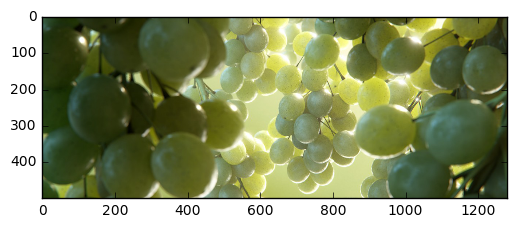

[INFO] downloaded: images/00000349.jpg
[INFO] downloaded: images/00000350.jpg
[INFO] downloaded: images/00000351.jpg
[INFO] downloaded: images/00000352.jpg
[INFO] downloaded: images/00000353.jpg
[INFO] downloaded: images/00000354.jpg
[INFO] downloaded: images/00000355.jpg
[INFO] downloaded: images/00000356.jpg
[INFO] downloaded: images/00000357.jpg
[INFO] downloaded: images/00000358.jpg
[INFO] downloaded: images/00000359.jpg
[INFO] downloaded: images/00000360.jpg
[INFO] downloaded: images/00000361.jpg
[INFO] downloaded: images/00000362.jpg
[INFO] downloaded: images/00000363.jpg
[INFO] downloaded: images/00000364.jpg
[INFO] downloaded: images/00000365.jpg
[INFO] downloaded: images/00000366.jpg
[INFO] downloaded: images/00000367.jpg
[INFO] downloaded: images/00000368.jpg
[INFO] downloaded: images/00000369.jpg
[INFO] downloaded: images/00000370.jpg
[INFO] error downloading https://lookaside.fbsbx.com/lookaside/crawler/media/?media_id=125806857505326
[INFO] downloaded: images/00000371.jpg


In [28]:
# open the text file that contains the urls
rows = open(urls).read().strip().split("\n")
#Keep track of the number of images downloaded
n_image = 0
ls_image_hash = list()
step_show_img = 50

def showMe(img_arr):
    '''
    Visualize image
    '''
    plt.imshow(img_arr)
    plt.show()

    
for url in rows:
    #Loop thru all the urls
    try:
    #try to download the image
        r = requests.get(url, timeout=60)
        # save the image locally
        fname = os.path.sep.join([output, "{}.jpg".format(str(n_image).zfill(8))])
        img_pil = Image.open(io.BytesIO(r.content))
        img_arr = np.array(img_pil)
        hash_object = hashlib.md5(img_arr)
        img_hash = hash_object.hexdigest()
        if img_hash in ls_image_hash:
            #This image is a duplicate -- skip
            print("Image is a duplicate - Not saved")
        else:
            #add to list
            ls_image_hash.append(img_hash)
            f = open(fname, "wb")
            f.close()
            n_image += 1
            if n_image % step_show_img == 0:
                showMe(img_pil)
            # update the counter
        print("[INFO] downloaded: {}".format(fname))

 
    except:
        print("[INFO] error downloading {}".format(url))